In [1]:
from golem import Golem
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

running build_ext
skipping '/h/matteoa/.pyxbld/temp.linux-x86_64-3.7/pyrex/golem/convolution.c' Cython extension (up-to-date)
skipping 'golem.convolution' extension (up-to-date)


In [2]:
def test_case_1(N, seed=42, noise=None, sparse=False):
    '''
    N : int
        choose number of observed points
    seed : int
        random seed for numpy
    noise : float, optional
        std dev of gaussian noise to be added to y (obs_values)
    sparse : bool
        if True, the lower and broader peak will have a lower density of points.
        Since a few points are dropped, N will be smaller than requested.
    '''
    if sparse is True:
        x1 = np.linspace(0, 0.5, int(round(N * 0.5, 0)), endpoint=False)
        x2 = np.linspace(0.5, 0.9, int(round(N * 0.4 / 3, 0)), endpoint=False)
        x3 = np.linspace(0.9, 1, int(round(N * 0.1 + 1, 0)))
        x = np.concatenate([x1, x2, x3])
    else:
        x = np.linspace(0, 1, N)

    y = []
    for i in x:
        if 0.1 <= i < 0.25:
            y.append(1)
        elif 0.5 <= i < 0.9:
            y.append(0.8)
        else:
            y.append(0)

    y = np.array(y)

    # add noise if needed
    if noise is not None:
        np.random.seed(seed)
        y += np.random.normal(loc=0.0, scale=noise, size=len(x))
        # rescale
        y = (y - np.amin(y)) / (np.amax(y) - np.amin(y))

    return x, y


def test_case_2(N, seed=42, noise=None):
    '''
    N : int
        choose number of observed points
    seed : int
        random seed for numpy
    noise : float, optional
        std dev of gaussian noise to be added to y (obs_values)
    '''
    x = np.linspace(0, 1, N)

    y = []
    for i in x:
        if i >= 0.1 and i < 0.4:
            y.append(0.75)
        elif i >= 0.6 and i < 0.9:
            if i >= 0.7 and i < 0.775:
                y.append(1)
            elif i < 0.65 or i > 0.85:
                y.append(1)
            else:
                y.append(0.5)
        else:
            y.append(0)

    y = np.array(y)

    # add noise if needed
    if noise is not None:
        np.random.seed(seed)
        y += np.random.normal(loc=0.0, scale=noise, size=len(x))
        # rescale
        y = (y - np.amin(y)) / (np.amax(y) - np.amin(y))

    return x, y

Parsing the tree...done [0.12 ms]
Convoluting...done [0.05 ms]


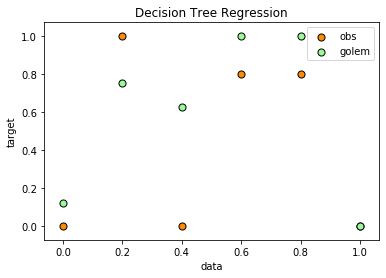

In [35]:
x, y = test_case_1(N=6, noise=0, sparse=False)

Xy = pd.DataFrame({'x0': x, 'y': y})
X = Xy.iloc[:, :1]

# Fit regression model
tree = DecisionTreeRegressor(max_depth=None)
tree.fit(X, y)

# Predict
x_test = np.linspace(0, 1, 1000)
y_test = tree.predict(x_test.reshape(-1, 1))

# Plot the results
plt.figure()
plt.scatter(X, y, s=50, edgecolor="black", c="darkorange", label="obs")
#plt.plot(x_test, y_test, color="cornflowerblue", label="TreeModel", linewidth=2, zorder=0)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")

#t = Golem(X=X, y=y, dims=[0], distributions=['gaussian'], scales=[0.2], beta=0)
#t = Golem(X=X, y=y, dims=[0], distributions=['uniform'], scales=[0.15], beta=0)
t = Golem(X=X, y=y, dims=[0], distributions=['uniform'], scales=[0.4], beta=0)
#t = Golem(X=X, y=y, dims=[0], distributions=['gaussian'], scales=[0.2], beta=0)

plt.scatter(X, t.y_robust_scaled, s=50, edgecolor="black", c='#98FB98', label='golem')



bboxes = t.get_tiles()
for box in bboxes:
    if np.isinf(box[0]['low']) is False:
        print(box[0]['low'])
        plt.vlines(x=box[0]['low'], ymin=0, ymax=1)
    if np.isinf(box[0]['high']) is False:
        print(box[0]['high'])
        plt.vlines(x=box[0]['high'], ymin=2, ymax=2)



plt.legend()

In [19]:
bboxes = t.get_tiles()

for box in bboxes:
    print(box[0]['low'], box[0]['high'])
    #print(np.isinf(box[0]['low']))
    if np.isinf(box[0]['low']) is False:
        plt.vlines(x=box[0]['low'], ymin=0, ymax=1, color='k', linestyle='--')

-inf 0.10000000149011612
0.10000000149011612 0.30000000447034836
0.30000000447034836 0.5000000149011612
0.5000000149011612 0.9000000059604645
0.9000000059604645 inf


Parsing the tree...done [0.14 ms]
Convoluting...done [0.04 ms]


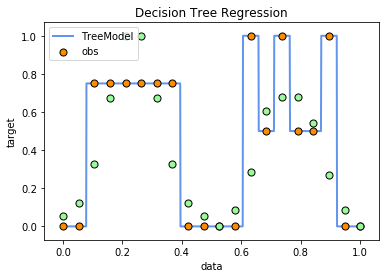

In [68]:
x, y = test_case_2(N=20, noise=0)

Xy = pd.DataFrame({'x0': x, 'y': y})
X = Xy.iloc[:, :1]

# Fit regression model
tree = DecisionTreeRegressor(max_depth=None)
tree.fit(X, y)

# Predict
x_test = np.linspace(0, 1, 1000)
y_test = tree.predict(x_test.reshape(-1, 1))

# Plot the results
plt.figure()
plt.scatter(X, y, s=50, edgecolor="black", c="darkorange", label="obs")
plt.plot(x_test, y_test, color="cornflowerblue", label="TreeModel", linewidth=2, zorder=0)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")

#t = Golem(X=X, y=y, dims=[0], distributions=['gaussian'], scales=[0.1], beta=0)
#t = Golem(X=X, y=y, dims=[0], distributions=['gaussian'], scales=[0.1], beta=1)
t = Golem(X=X, y=y, dims=[0], distributions=['uniform'], scales=[0.2], beta=1)

plt.scatter(X, t.y_robust_scaled, s=50, edgecolor="black", c='#98FB98')
plt.legend()

In [69]:
t.y_robust

array([-0.15122178, -0.0854665 ,  0.11190192,  0.44088347,  0.75      ,
        0.75      ,  0.44088347,  0.11190192, -0.0854665 , -0.15122178,
       -0.20162907, -0.11981431,  0.07080252,  0.3735199 ,  0.44302233,
        0.44302235,  0.3136041 ,  0.05350977, -0.11981434, -0.20162905])

In [72]:
def bertsimas(x,y):
    '''min at (2.8,4.0)
    '''
    f = (2*(x**6) -
         12.2*(x**5) +
         21.2*(x**4) + 
         6.2*x -
         6.4*(x**3) -
         4.7*(x**2) + 
         y**6 - 
         11*(y**5) +
         43.3*(y**4) -
         10*y -
         74.8*(y**3) +
         56.9*(y**2) -
         4.1*x*y -
         0.1*(y**2)*(x**2) +
         0.4*(y**2)*x + 
         0.4*(x**2)*y)
    return f

xlims = [-1, 3.2]
ylims = [-0.5, 4.4]

Parsing the tree...done [0.45 ms]
Convoluting...done [1.13 ms]


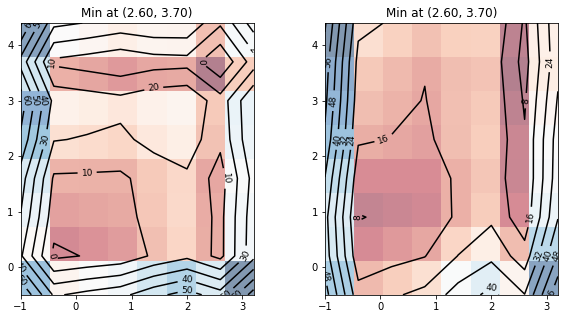

In [82]:
# data
N = 8
scale_x0 = 1.5
scale_x1 = 1.5
beta = 0

x0 = np.linspace(xlims[0], xlims[1], N)
x1 = np.linspace(ylims[0], ylims[1], N)
X0, X1 = np.meshgrid(x0, x1)
Y = bertsimas(X0, X1)

# plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
contours = ax1.contour(X0, X1, Y, 8, colors='k')
_ = ax1.clabel(contours, inline=True, fontsize=9, fmt='%d')
_ = ax1.imshow(Y, extent=[xlims[0],xlims[1],ylims[0],ylims[1]], origin='lower', cmap='RdBu', alpha=0.5)
_ = ax1.set_title("Min at (%.2f, %.2f)" % (X0.flatten()[np.argmin(Y)], X1.flatten()[np.argmin(Y)]))

X = np.concatenate([X0.flatten().reshape(-1,1), X1.flatten().reshape(-1,1)], axis=1)
y = Y.flatten()

#t = Golem(X=X, y=y, dims=[0,1], distributions=['gaussian', 'gaussian'], scales=[0.8, 0.8], beta=1)
#t = Golem(X=X, y=y, dims=[0,1], distributions=['uniform', 'uniform'], scales=[1.5, 1.5], beta=0)
#t = Golem(X=X, y=y, dims=[0,1], distributions=['uniform', 'gaussian'], scales=[1.5, 0.8], beta=0)

#t = Golem(X=X, y=y, dims=[0], distributions=['uniform'], scales=[1.5], beta=0)
t = Golem(X=X, y=y, dims=[1], distributions=['gaussian'], scales=[0.8], beta=0)

newy = np.reshape(t.y_robust, newshape=np.shape(X0))

# plot
contours = ax2.contour(X0, X1, newy, 8, colors='k')
_ = ax2.clabel(contours, inline=True, fontsize=9, fmt='%d')
_ = ax2.imshow(newy, extent=[xlims[0],xlims[1],ylims[0],ylims[1]], origin='lower', cmap='RdBu', alpha=0.5)
_ = ax2.set_title("Min at (%.2f, %.2f)" % (np.array(X)[np.argmin(t.y_robust)][0],
                                            np.array(X)[np.argmin(t.y_robust)][1]))

In [80]:
t.y_robust

array([20.98193969, 12.75933982, 10.32132122, 11.93935509, 15.35389623,
       18.89057628, 23.24143348, 30.44337903, 12.8983337 ,  3.94355047,
        1.0179131 ,  2.12497054,  4.69172624,  7.3220051 , 10.95281735,
       17.61357528, 11.62599335,  2.14737624, -0.35343126,  1.42467053,
        3.62218697,  5.202056  ,  7.77144999, 13.91753423, 15.2290975 ,
        5.06006705,  2.42149155,  4.80473107,  7.06025407,  7.78635802,
        9.41142273, 15.06060216, 20.66381366,  9.59301638,  6.13926777,
        7.88966823,  9.33714117,  9.12562961,  9.99228692, 14.90056455,
       23.34798155, 11.46863821,  7.0661326 ,  7.6896919 ,  7.91192383,
        6.77630077,  6.99633477, 11.10217231, 24.40852822, 12.05746151,
        6.95540145,  6.78705572,  6.3548293 ,  4.78383947,  4.69791703,
        8.37190267, 28.95544536, 16.3531763 , 11.01953162, 10.68062095,
        9.97610287,  8.03913705,  7.68481882, 11.13276007])